Dataset: International Airline Passengers

Model: LSTM, a type of recurrent neural networks(RNN)

In [1]:
import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
df = pd.read_csv('../../datasets/AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True) 
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [6]:
train_size = int(len(df) * 0.66)
test_size = len(df) - train_size
train, test = df[0:train_size], df[train_size:len(df)]
print(len(train), len(test))

95 49


Rescaling the data is needed because of 'backpropagation' is applied to minimise the loss function

In [7]:
from sklearn.preprocessing import RobustScaler


transformer = RobustScaler()

transformer = transformer.fit(train[['#Passengers']])

train['#Passengers'] = transformer.transform(train[['#Passengers']])

test['#Passengers'] = transformer.transform(test[['#Passengers']])

In [8]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [10]:
TIME_STEPS = 2
X_train, y_train = create_dataset(train, train['#Passengers'], time_steps=TIME_STEPS)
X_test, y_test = create_dataset(test, test['#Passengers'], time_steps=TIME_STEPS)
y_test.shape

(47,)

In [11]:
X_train.shape

(93, 2, 1)

In [12]:
print (*X_test)

[[0.97272727]
 [1.05454545]] [[1.05454545]
 [0.92727273]] [[0.92727273]
 [1.42727273]] [[1.42727273]
 [1.35454545]] [[1.35454545]
 [1.41818182]] [[1.41818182]
 [2.02727273]] [[2.02727273]
 [2.41818182]] [[2.41818182]
 [2.43636364]] [[2.43636364]
 [1.86363636]] [[1.86363636]
 [1.34545455]] [[1.34545455]
 [0.96363636]] [[0.96363636]
 [1.24545455]] [[1.24545455]
 [1.28181818]] [[1.28181818]
 [1.08181818]] [[1.08181818]
 [1.48181818]] [[1.48181818]
 [1.35454545]] [[1.35454545]
 [1.49090909]] [[1.49090909]
 [2.14545455]] [[2.14545455]
 [2.65454545]] [[2.65454545]
 [2.78181818]] [[2.78181818]
 [1.86363636]] [[1.86363636]
 [1.45454545]] [[1.45454545]
 [1.00909091]] [[1.00909091]
 [1.25454545]] [[1.25454545]
 [1.46363636]] [[1.46363636]
 [1.3       ]] [[1.3       ]
 [1.88181818]] [[1.88181818]
 [1.79090909]] [[1.79090909]
 [2.00909091]] [[2.00909091]
 [2.48181818]] [[2.48181818]
 [3.17272727]] [[3.17272727]
 [3.27272727]] [[3.27272727]
 [2.4       ]] [[2.4       ]
 [1.89090909]] [[1.89090909]


In [13]:
c = 0
for i in X_test:
    for j in i:
        for val in j:
            print(val,  end = ' ')

    print(end =" ") # this is just to add the next printing in the same line
    print (" -- to predict:", y_test[c])
    c = c+1

0.9727272727272728 1.0545454545454545   -- to predict: 0.9272727272727272
1.0545454545454545 0.9272727272727272   -- to predict: 1.4272727272727272
0.9272727272727272 1.4272727272727272   -- to predict: 1.3545454545454545
1.4272727272727272 1.3545454545454545   -- to predict: 1.4181818181818182
1.3545454545454545 1.4181818181818182   -- to predict: 2.0272727272727273
1.4181818181818182 2.0272727272727273   -- to predict: 2.418181818181818
2.0272727272727273 2.418181818181818   -- to predict: 2.4363636363636365
2.418181818181818 2.4363636363636365   -- to predict: 1.8636363636363635
2.4363636363636365 1.8636363636363635   -- to predict: 1.3454545454545455
1.8636363636363635 1.3454545454545455   -- to predict: 0.9636363636363636
1.3454545454545455 0.9636363636363636   -- to predict: 1.2454545454545454
0.9636363636363636 1.2454545454545454   -- to predict: 1.2818181818181817
1.2454545454545454 1.2818181818181817   -- to predict: 1.0818181818181818
1.2818181818181817 1.0818181818181818   -

In [14]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128, 
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [15]:
history = model.fit(
    X_train, y_train, 
    epochs=30, 
    batch_size=20, 
    validation_split=0.1,
    shuffle=False
)

Epoch 1/30
5/5 [==============================] - 12s 167ms/step - loss: 0.2789 - val_loss: 1.5170
Epoch 2/30
5/5 [==============================] - 0s 18ms/step - loss: 0.2300 - val_loss: 1.2379
Epoch 3/30
5/5 [==============================] - 0s 19ms/step - loss: 0.1886 - val_loss: 0.9788
Epoch 4/30
5/5 [==============================] - 0s 19ms/step - loss: 0.1532 - val_loss: 0.7460
Epoch 5/30
5/5 [==============================] - 0s 17ms/step - loss: 0.1240 - val_loss: 0.5444
Epoch 6/30
5/5 [==============================] - 0s 17ms/step - loss: 0.0986 - val_loss: 0.3809
Epoch 7/30
5/5 [==============================] - 0s 16ms/step - loss: 0.0800 - val_loss: 0.2635
Epoch 8/30
5/5 [==============================] - 0s 15ms/step - loss: 0.0666 - val_loss: 0.1950
Epoch 9/30
5/5 [==============================] - 0s 16ms/step - loss: 0.0591 - val_loss: 0.1680
Epoch 10/30
5/5 [==============================] - 0s 16ms/step - loss: 0.0548 - val_loss: 0.1625
Epoch 11/30
5/5 [==========

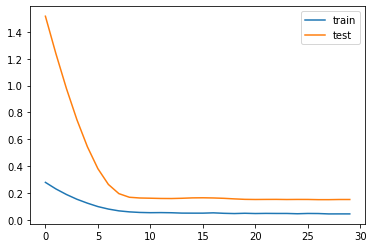

In [16]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [17]:
y_pred = model.predict(X_test)

In [19]:
y_train_inv = transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = transformer.inverse_transform(y_pred)

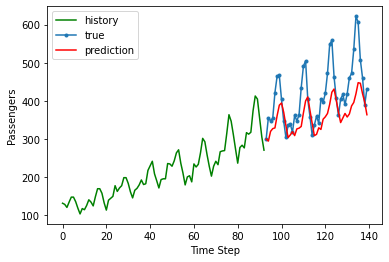

In [20]:
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Passengers')
plt.xlabel('Time Step')
plt.legend()
plt.show()

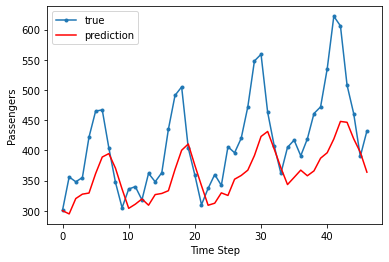

-----------------------------------------------------------
-----------------------------------------------------------
RMSE value on validation set: 75.879121899987


In [21]:
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Passengers')
plt.xlabel('Time Step')
plt.legend()
plt.show()
rmse=np.sqrt(np.mean(np.power((np.array(y_test_inv.flatten() - y_pred_inv.flatten())),2)))

print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('RMSE value on validation set:',rmse)

In [22]:
import math
from sklearn.metrics import mean_squared_error
testScore = math.sqrt(mean_squared_error(y_test_inv.flatten(), y_pred_inv.flatten()))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 75.88 RMSE


In [23]:
from sklearn.metrics import r2_score
score = r2_score(y_test_inv.flatten(), y_pred_inv.flatten())
print("R2 score is: ", score)

R2 score is:  0.032535026922948185


Notice: This is a practice of time series forecasting on the LSTM model. Some code chunks are the adapted ones. Credits to original author.